In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [2]:
df = pd.read_excel("premiums_young.xlsx")
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712


In [3]:
df.shape

(20096, 13)

In [4]:
df.columns = df.columns.str.replace(" ","_").str.lower()
df.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712


In [5]:
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           2
employment_status        1
income_level             4
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [6]:
# as the dataset is of 50k values we can drop them as it can not be that much efficient

In [7]:
df.dropna(inplace=True)
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [8]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.718019,22.510851,8142.096267
std,2.294052,0.940713,23.420493,2749.906347
min,18.000000,-3.000000,1.000000,3501.000000
25%,19.000000,0.000000,6.000000,6022.250000
50%,22.000000,0.000000,16.000000,7939.000000
75%,23.000000,1.000000,31.000000,9561.000000
max,25.000000,3.000000,790.000000,18186.000000


In [10]:
df[df.number_of_dependants < 0]

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
150,23,Female,Southwest,Unmarried,-3,Underweight,No Smoking,Freelancer,10L - 25L,18,No Disease,Silver,9309
871,18,Male,Southwest,Unmarried,-3,Overweight,No Smoking,Freelancer,25L - 40L,28,No Disease,Silver,8095
906,19,Male,Northwest,Unmarried,-3,Underweight,No Smoking,Freelancer,25L - 40L,40,No Disease,Bronze,4641
2462,20,Male,Northeast,Unmarried,-3,Underweight,Regular,Freelancer,10L - 25L,20,Diabetes,Silver,9640
3059,20,Female,Southwest,Unmarried,-3,Underweight,No Smoking,Salaried,> 40L,77,No Disease,Silver,9299
3120,25,Male,Northwest,Unmarried,-1,Underweight,No Smoking,Salaried,10L - 25L,13,No Disease,Bronze,7234
3780,23,Female,Southeast,Unmarried,-3,Normal,Regular,Freelancer,25L - 40L,40,No Disease,Bronze,5003
5593,25,Male,Northwest,Unmarried,-1,Normal,No Smoking,Salaried,10L - 25L,20,No Disease,Bronze,6299
7585,22,Male,Northwest,Unmarried,-3,Normal,Occasional,Self-Employed,<10L,8,No Disease,Gold,13596
9765,18,Female,Southeast,Unmarried,-1,Underweight,No Smoking,Self-Employed,<10L,4,No Disease,Bronze,9366


In [11]:
df[df.number_of_dependants < 0]["number_of_dependants"].unique()

array([-3, -1])

In [12]:
df["number_of_dependants"] = abs(df["number_of_dependants"])
df["number_of_dependants"].describe()

count    20090.000000
mean         0.722598
std          0.937200
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: number_of_dependants, dtype: float64

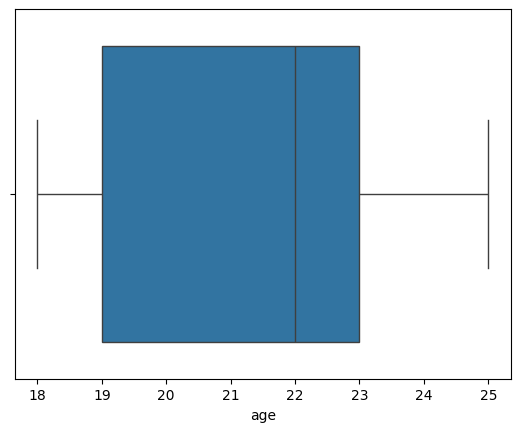

In [13]:
sns.boxplot(x=df["age"])
plt.show()

In [14]:
df.select_dtypes(["float64","int64"])

,age,number_of_dependants,income_lakhs,annual_premium_amount
0,18,0,99,13365
1,22,0,3,11050
2,21,0,97,11857
3,25,0,15,5684
4,20,2,14,5712
...,...,...,...,...
20091,18,0,91,11603
20092,23,0,57,14498
20093,24,0,35,9111
20094,21,0,32,8564


In [15]:
numeric_features = df.select_dtypes(["float64","int64"]).columns
numeric_features

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

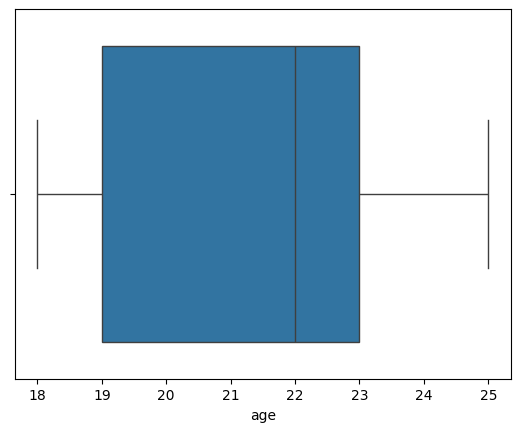

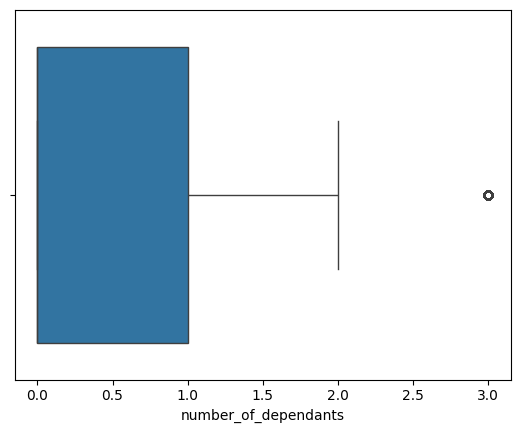

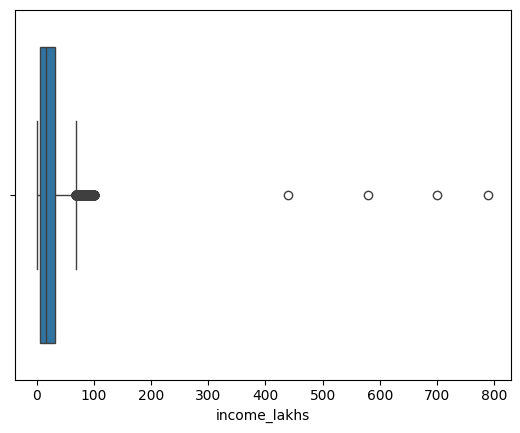

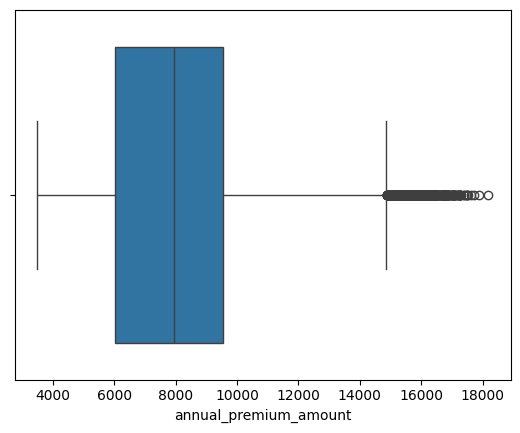

In [16]:
for col in numeric_features :
    sns.boxplot(x=df[col])
    plt.show()

In [17]:
df[df["age"]>100]["age"].unique()

array([], dtype=int64)

In [18]:
df[df["age"]>100]["age"].shape

(0,)

In [19]:
# 58 is less so we can drop then instead of giving mean median mode

In [20]:
df1 = df[df["age"]<=100].copy()
df1.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712


In [21]:
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.722598,22.510851,8142.096267
std,2.294052,0.937200,23.420493,2749.906347
min,18.000000,0.000000,1.000000,3501.000000
25%,19.000000,0.000000,6.000000,6022.250000
50%,22.000000,0.000000,16.000000,7939.000000
75%,23.000000,1.000000,31.000000,9561.000000
max,25.000000,3.000000,790.000000,18186.000000


<Axes: xlabel='income_lakhs', ylabel='Count'>

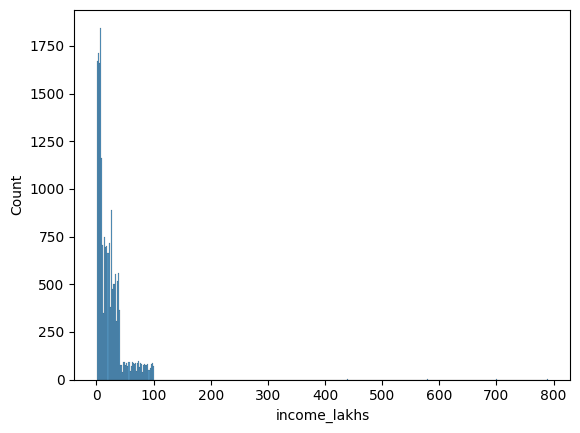

In [22]:
sns.histplot(df["income_lakhs"])

In [23]:
def get_iqr_bounds(col) :
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower_bound =  q1 - 1.5*iqr
    upper_bound =  q3 + 1.5*iqr
    return lower_bound,upper_bound

In [24]:
lower_bound_income,upper_bound_income = get_iqr_bounds(df1["income_lakhs"])
lower_bound_income,upper_bound_income

(np.float64(-31.5), np.float64(68.5))

In [25]:
# a person can has 67 lakhs and more in india so we choose diff method

In [26]:
quantile_threshold = df1.income_lakhs.quantile(0.999)
quantile_threshold

np.float64(100.0)

In [27]:
df1[df1.income_lakhs > quantile_threshold].shape

(4, 13)

In [28]:
df2 = df1[df1.income_lakhs <= quantile_threshold].copy()
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712


In [29]:
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,20086.000000,20086.000000,20086.000000,20086.000000
mean,21.494474,0.722742,22.390371,8141.799263
std,2.294248,0.937238,21.732062,2749.912486
min,18.000000,0.000000,1.000000,3501.000000
25%,19.000000,0.000000,6.000000,6022.000000
50%,22.000000,0.000000,16.000000,7939.000000
75%,23.000000,1.000000,31.000000,9561.000000
max,25.000000,3.000000,100.000000,18186.000000


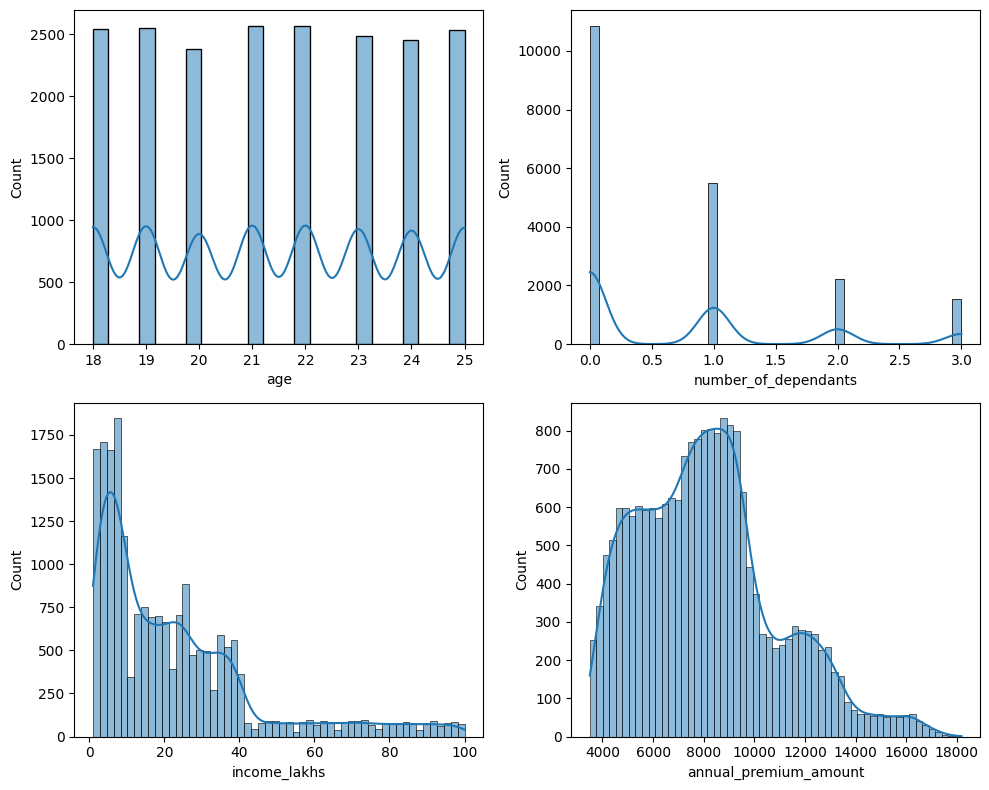

In [30]:
#univariate analysis
fig,axs = plt.subplots(2,2,figsize=(10,8))
axs = axs.flatten()
for i,col in enumerate(numeric_features) :
    sns.histplot(df2[col],kde=True,ax=axs[i])
    plt.xlabel(col)
plt.tight_layout()
plt.show()

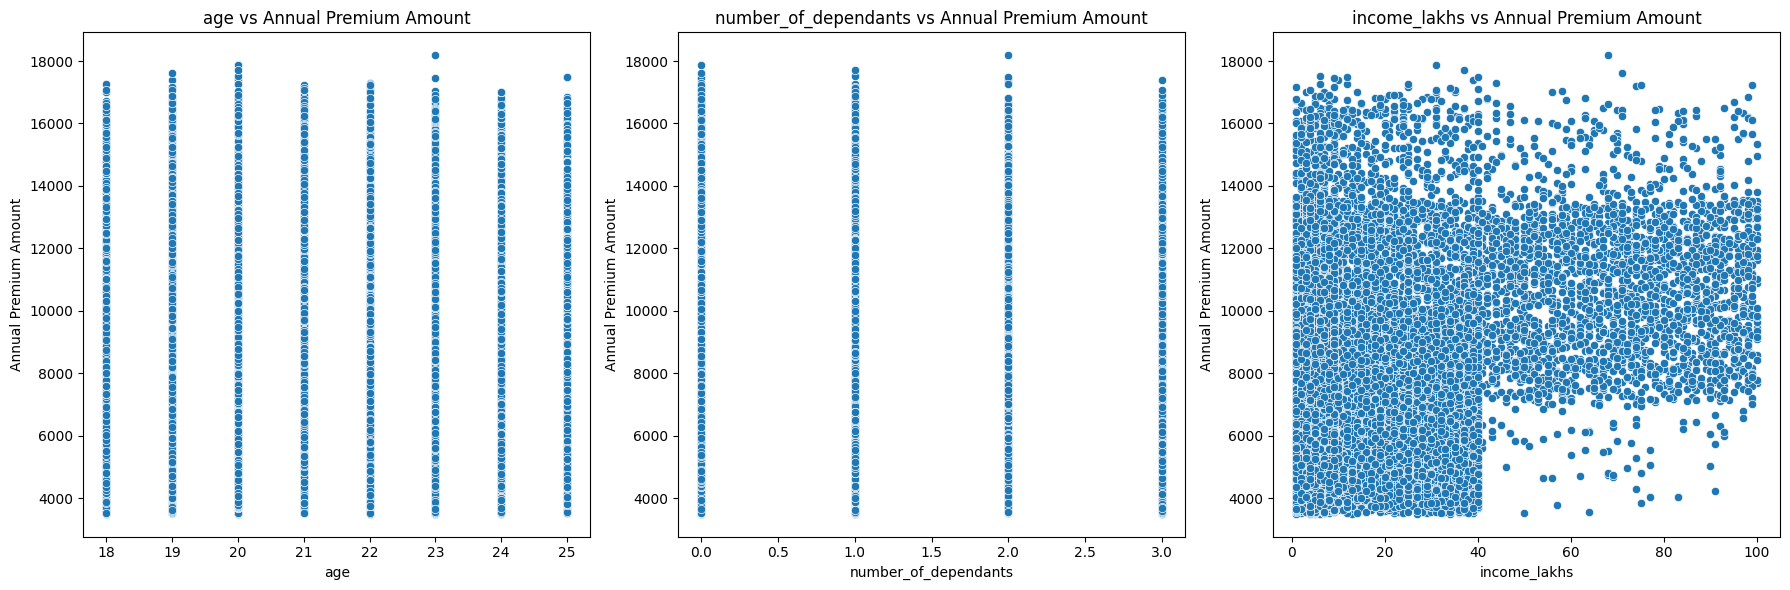

In [31]:
fig, axs = plt.subplots(1, len(numeric_features)-1, figsize=(18, 6))

for ax, col in zip(axs, numeric_features):
    if col != "annual_premium_amount":
        sns.scatterplot(x=df2[col], y=df2["annual_premium_amount"], ax=ax)
        ax.set_xlabel(col)
        ax.set_ylabel("Annual Premium Amount")
        ax.set_title(f"{col} vs Annual Premium Amount")

plt.tight_layout()
plt.show()


In [32]:
categorical_columns = df2.select_dtypes("object").columns
categorical_columns

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

In [33]:
for col in categorical_columns :
    print(f"{col} : {df2[col].unique()}")

gender : ['Male' 'Female']
region : ['Northeast' 'Northwest' 'Southeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Overweight' 'Underweight' 'Normal' 'Obesity']
smoking_status : ['Regular' 'No Smoking' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status : ['Self-Employed' 'Freelancer' 'Salaried']
income_level : ['> 40L' '<10L' '10L - 25L' '25L - 40L']
medical_history : ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']
insurance_plan : ['Silver' 'Bronze' 'Gold']


In [34]:
df2['smoking_status'].replace({
    "Smoking=0" : "No Smoking",
    "Does Not Smoke" : "No Smoking",
    "Not Smoking" : "No Smoking"
},inplace=True)


C:\Users\msart\AppData\Local\Temp\ipykernel_25596\4108123457.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['smoking_status'].replace({


In [35]:
for col in categorical_columns :
    print(f"{col} : {df2[col].unique()}")

gender : ['Male' 'Female']
region : ['Northeast' 'Northwest' 'Southeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Overweight' 'Underweight' 'Normal' 'Obesity']
smoking_status : ['Regular' 'No Smoking' 'Occasional']
employment_status : ['Self-Employed' 'Freelancer' 'Salaried']
income_level : ['> 40L' '<10L' '10L - 25L' '25L - 40L']
medical_history : ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']
insurance_plan : ['Silver' 'Bronze' 'Gold']


In [36]:
pct = df2["gender"].value_counts()
pct

gender
Male      11055
Female     9031
Name: count, dtype: int64

<Axes: xlabel='gender'>

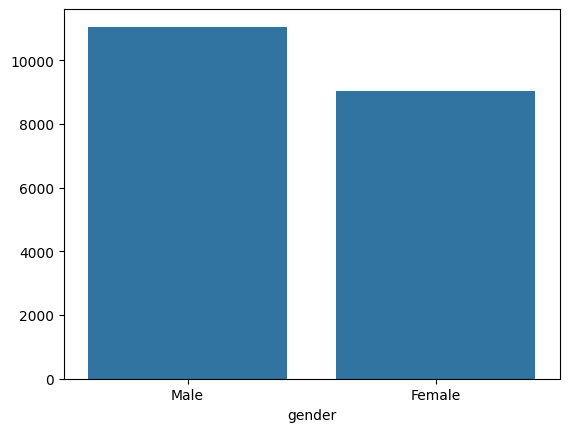

In [37]:
sns.barplot(x=pct.index,y=pct.values)

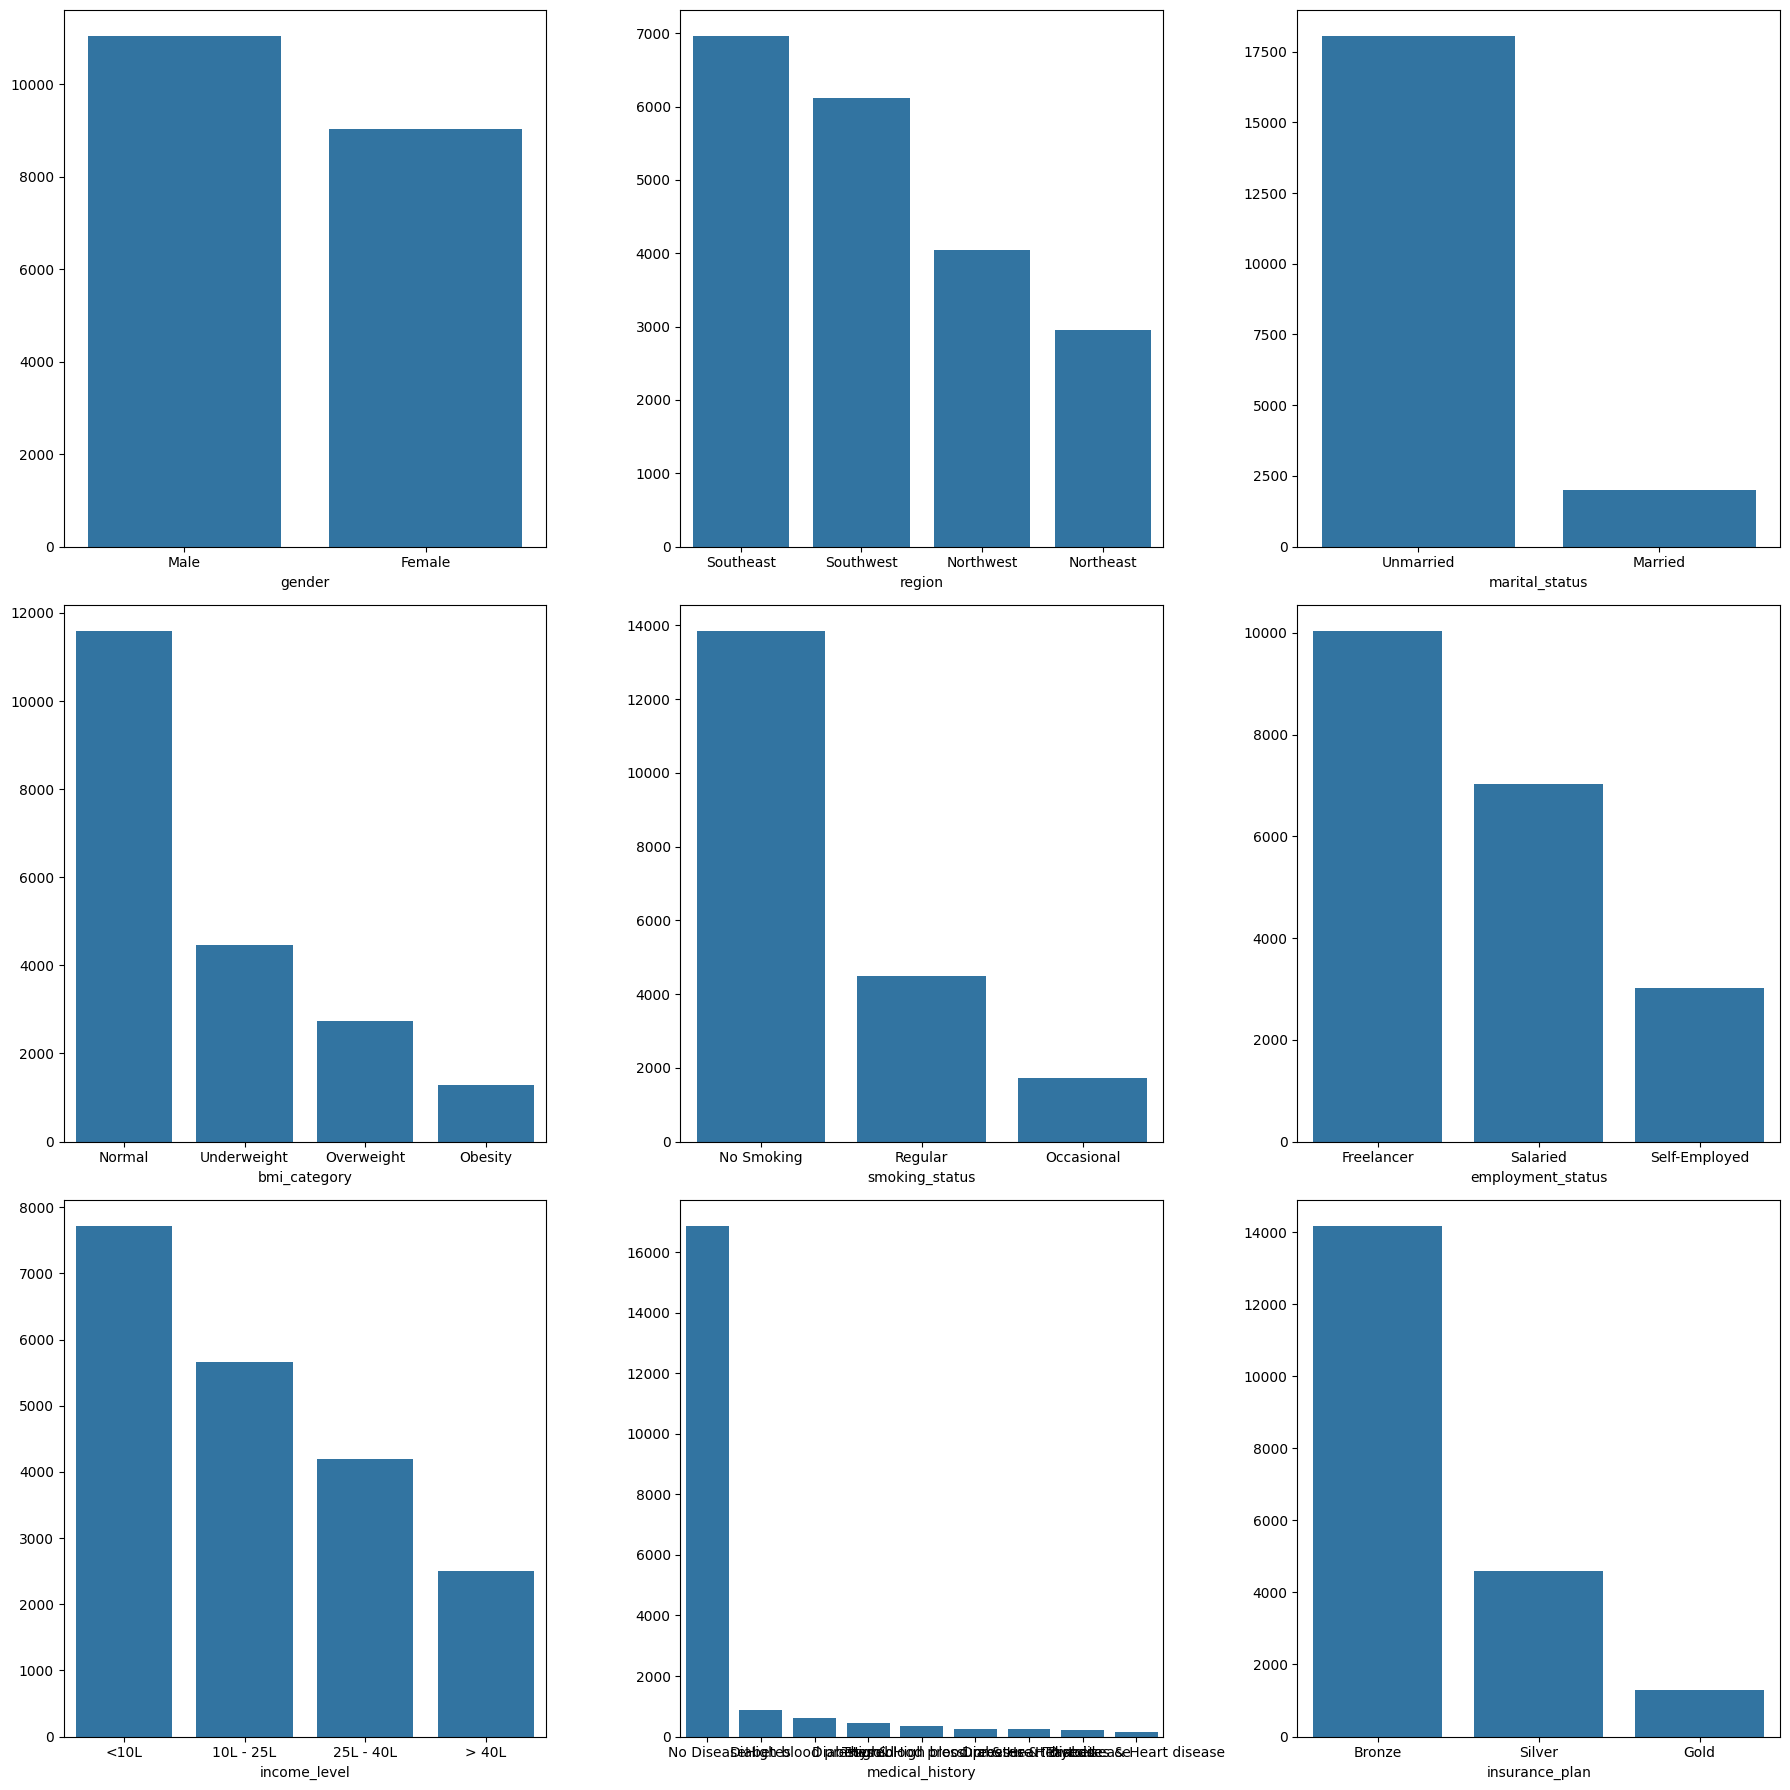

In [38]:
#univariate analysis
fig,axs = plt.subplots(3,3,figsize=(18,18))
axs = axs.flatten()
for i,col in enumerate(categorical_columns) :
    categorical_pct = df2[col].value_counts()
    sns.barplot(x=categorical_pct.index,y=categorical_pct.values,ax=axs[i])
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [39]:
crosstab = pd.crosstab(df2["income_level"],df2["insurance_plan"])
crosstab

insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,4508,326,828
25L - 40L,3382,209,608
<10L,6172,404,1145
> 40L,115,366,2023


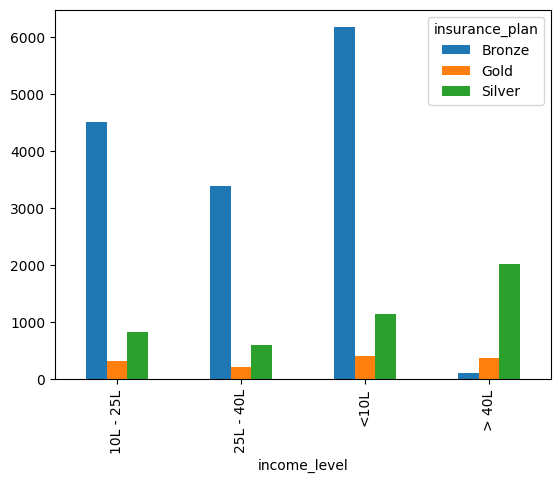

In [40]:
crosstab.plot(kind="bar")
plt.show()

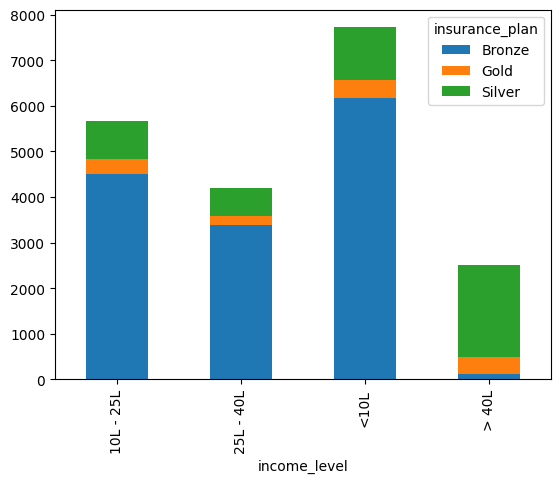

In [41]:
crosstab.plot(kind="bar",stacked = True)
plt.show()

<Axes: xlabel='insurance_plan', ylabel='income_level'>

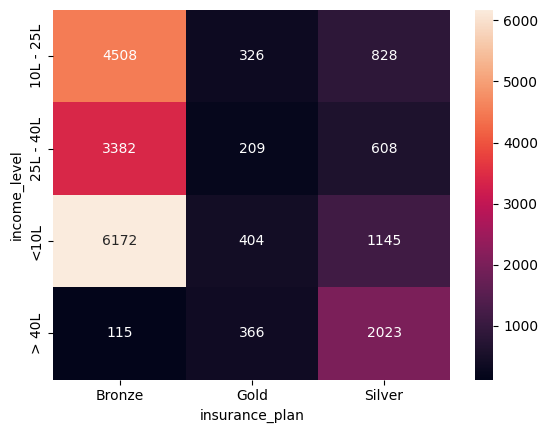

In [42]:
sns.heatmap(crosstab,annot=True,fmt="d")

In [43]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712


In [44]:
df2.medical_history.unique()

array(['High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Diabetes & Heart disease',
       'Diabetes', 'Diabetes & Thyroid', 'Heart disease', 'Thyroid',
       'High blood pressure & Heart disease'], dtype=object)

In [45]:
risk_scores = {
    "diabetes" : 6,
    "high blood pressure" : 6,
    "no disease" : 0,
    "thyroid" : 5,
    "heart disease" : 8,
    "none" : 0
}
df2[["disease1","disease2"]] = df2["medical_history"].str.lower().str.strip().str.split(" & ", expand=True).apply(lambda x: x.str.strip()) 

In [46]:
df2.head(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,high blood pressure,None
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,no disease,None
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,no disease,None
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,no disease,None
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,no disease,None


In [47]:
df2['disease1'].fillna("none",inplace=True)
df2['disease2'].fillna("none",inplace=True)
df2.head()

C:\Users\msart\AppData\Local\Temp\ipykernel_25596\2289181906.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['disease1'].fillna("none",inplace=True)
C:\Users\msart\AppData\Local\Temp\ipykernel_25596\2289181906.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,high blood pressure,none
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,no disease,none
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,no disease,none
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,no disease,none
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,no disease,none


In [48]:
df2["total_risk_score"] = 0 

df2["total_risk_score"] = sum(df2[col].map(risk_scores) for col in ["disease1", "disease2"])
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,high blood pressure,none,6
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,no disease,none,0
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,no disease,none,0
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,no disease,none,0
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,no disease,none,0


In [49]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
df2["total_risk_score"] = minmax.fit_transform(df2[["total_risk_score"]])
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,high blood pressure,none,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,no disease,none,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,no disease,none,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,no disease,none,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,no disease,none,0.000000


In [50]:
df2.insurance_plan.unique()

array(['Silver', 'Bronze', 'Gold'], dtype=object)

In [51]:
# we can do label encoding
label_insurance = {
    "Bronze" : 1,
    "Silver" : 2,
    "Gold" : 3
}
df2["insurance_plan"] = df2["insurance_plan"].map(label_insurance)
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,2,13365,high blood pressure,none,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,2,11050,no disease,none,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,2,11857,no disease,none,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,1,5684,no disease,none,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,1,5712,no disease,none,0.000000


In [52]:
df2["income_level"].unique()

array(['> 40L', '<10L', '10L - 25L', '25L - 40L'], dtype=object)

In [53]:
label_income_level = {
    '<10L' : 1, '10L - 25L' :2, '> 40L' : 3, '25L - 40L' :4
}
df2["income_level"] = df2["income_level"].map(label_income_level)
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,3,99,High blood pressure,2,13365,high blood pressure,none,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,1,3,No Disease,2,11050,no disease,none,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,3,97,No Disease,2,11857,no disease,none,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,2,15,No Disease,1,5684,no disease,none,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,2,14,No Disease,1,5712,no disease,none,0.000000


In [54]:
nominal_cols = ["gender","region","marital_status","bmi_category","smoking_status","employment_status"]
df3 = pd.get_dummies(df2,columns=nominal_cols,drop_first=True,dtype=int)
df3.head()

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,3,99,High blood pressure,2,13365,high blood pressure,none,0.428571,...,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,No Disease,2,11050,no disease,none,0.000000,...,0,0,1,0,0,1,0,0,0,0
2,21,0,3,97,No Disease,2,11857,no disease,none,0.000000,...,1,0,1,0,0,0,0,1,1,0
3,25,0,2,15,No Disease,1,5684,no disease,none,0.000000,...,1,0,1,0,0,0,0,0,0,0
4,20,2,2,14,No Disease,1,5712,no disease,none,0.000000,...,1,0,1,0,1,0,0,0,0,0


In [55]:
df3.drop(["disease1","disease2","medical_history"],inplace=True,axis=1)
df3.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,total_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,3,99,2,13365,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,2,11050,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,21,0,3,97,2,11857,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,25,0,2,15,1,5684,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,20,2,2,14,1,5712,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


In [56]:
cm = df3.corr()
cm

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,total_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
age,1.000000,0.003096,-0.001661,-0.016671,-0.018195,-0.010815,0.003074,0.007791,0.002698,-0.003419,0.006922,0.000389,-0.001597,0.022006,-0.003068,-0.011040,-0.009827,-0.009493,0.001680
number_of_dependants,0.003096,1.000000,-0.010081,-0.014835,0.007802,0.005909,0.044009,-0.008213,0.014965,-0.000088,-0.011166,-0.722696,0.004090,0.002822,-0.000630,-0.015309,-0.001891,-0.013320,0.010281
income_level,-0.001661,-0.010081,1.000000,0.674861,0.123583,0.092784,0.001137,0.058815,-0.002084,0.000394,0.003493,0.007865,0.003539,0.015113,-0.013101,0.006205,0.013495,-0.148934,0.111289
income_lakhs,-0.016671,-0.014835,0.674861,1.000000,0.380968,0.290683,-0.006630,0.000951,-0.006349,-0.004859,0.015674,0.014021,0.014379,0.008312,-0.000598,0.006187,-0.010641,-0.084416,0.083316
insurance_plan,-0.018195,0.007802,0.123583,0.380968,1.000000,0.761004,0.001951,-0.016589,-0.006221,-0.007836,0.013644,-0.006561,0.002285,-0.006236,0.007766,-0.001517,-0.008755,-0.016911,0.026543
annual_premium_amount,-0.010815,0.005909,0.092784,0.290683,0.761004,1.000000,0.090702,0.000251,-0.017573,0.002388,0.008090,-0.008706,0.064828,0.036573,0.004972,0.008673,0.085407,-0.015318,0.024136
total_risk_score,0.003074,0.044009,0.001137,-0.006630,0.001951,0.090702,1.000000,-0.000234,-0.000102,-0.008037,-0.004214,-0.056335,0.001278,0.000108,-0.010735,-0.008724,0.003557,-0.005101,-0.002150
gender_Male,0.007791,-0.008213,0.058815,0.000951,-0.016589,0.000251,-0.000234,1.000000,-0.002796,-0.000131,-0.002445,0.009276,-0.061257,0.043389,-0.060075,0.053469,0.202788,0.006978,-0.001052
region_Northwest,0.002698,0.014965,-0.002084,-0.006349,-0.006221,-0.017573,-0.000102,-0.002796,1.000000,-0.365912,-0.332236,-0.009604,-0.010099,0.003283,0.003720,-0.000543,-0.002375,0.010613,0.000254
region_Southeast,-0.003419,-0.000088,0.000394,-0.004859,-0.007836,0.002388,-0.008037,-0.000131,-0.365912,1.000000,-0.482398,0.000952,0.004409,0.010248,0.001118,-0.006319,-0.001805,-0.004268,0.000575


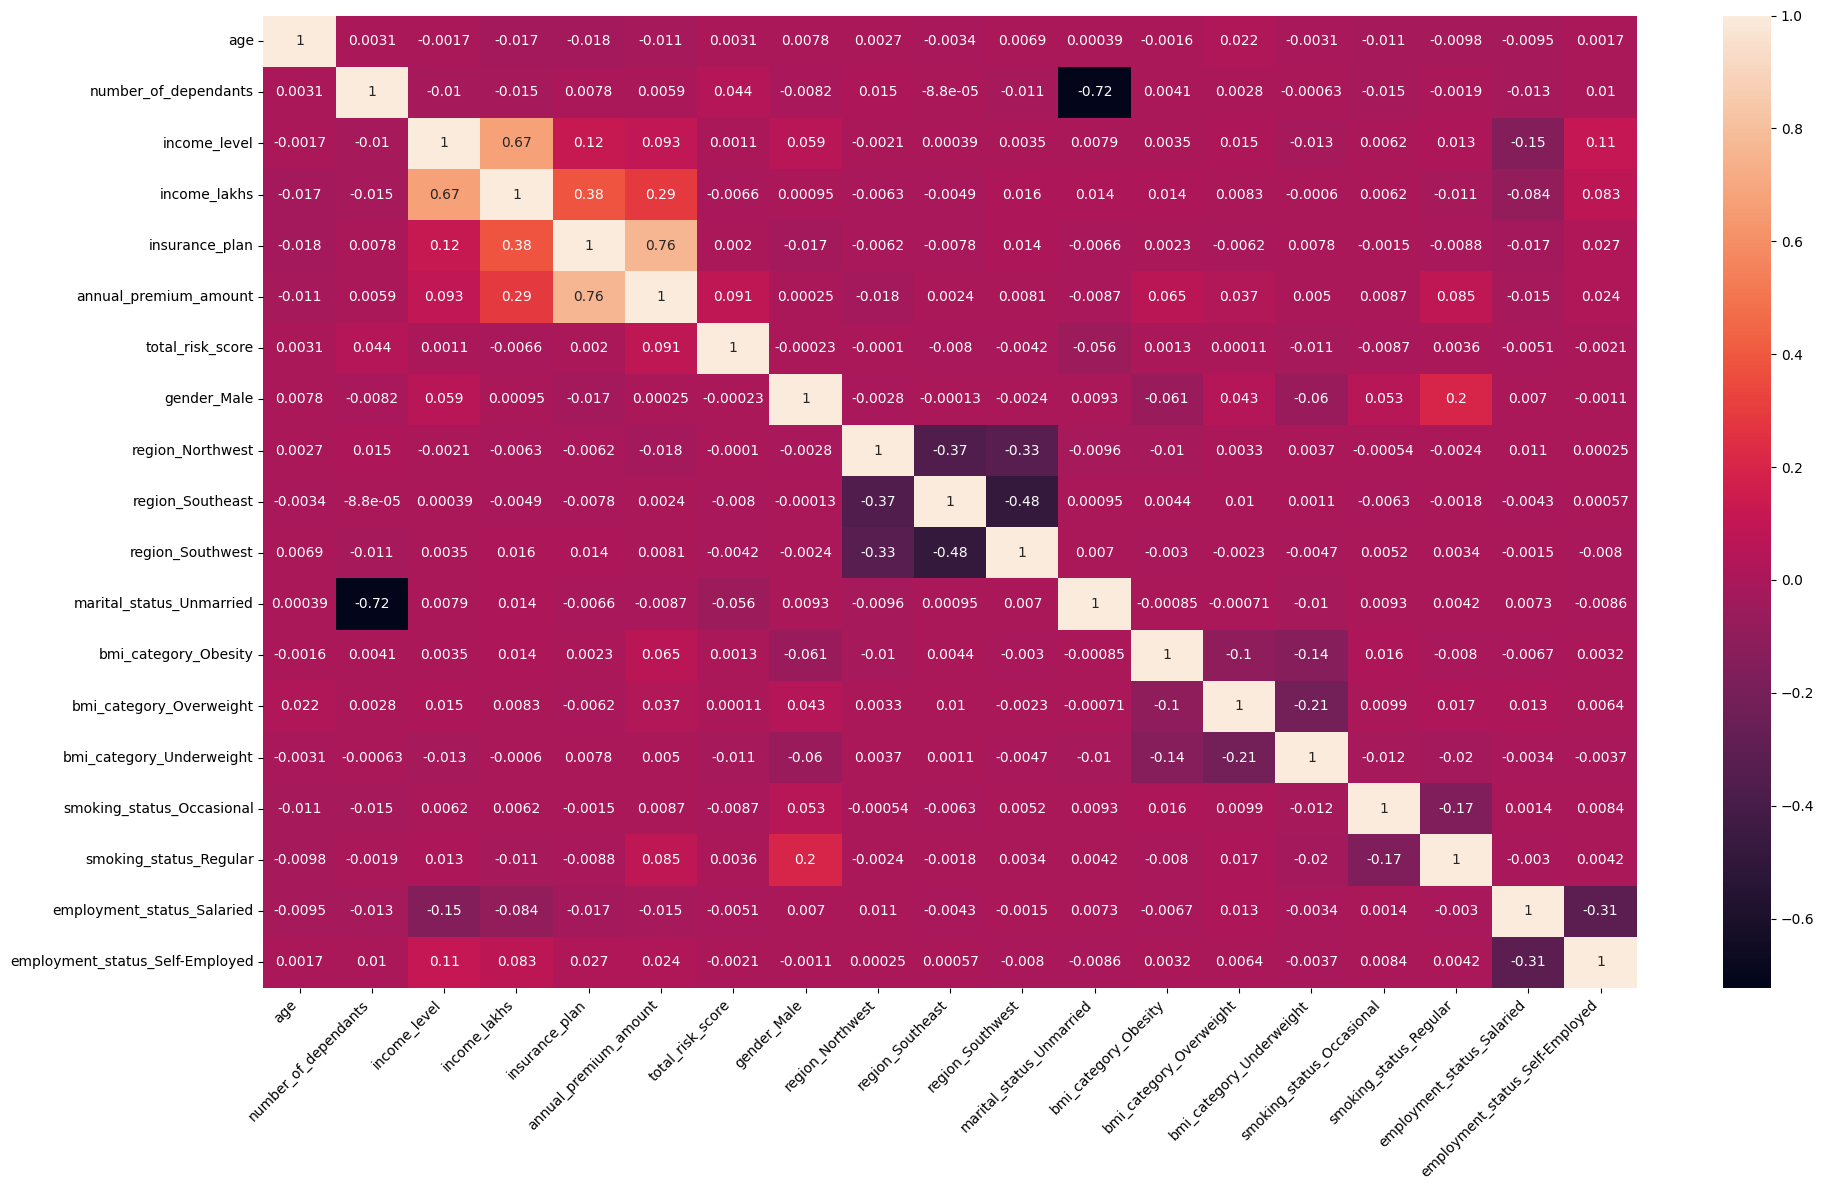

In [57]:
plt.figure(figsize=(20,12))
sns.heatmap(cm,annot=True)
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [58]:
X = df3.drop("annual_premium_amount",axis=1)
y = df3["annual_premium_amount"]
X

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,total_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,3,99,2,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,2,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,21,0,3,97,2,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,25,0,2,15,1,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,20,2,2,14,1,0.000000,1,0,1,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20091,18,0,3,91,3,0.000000,0,0,1,0,1,0,0,1,0,0,0,0
20092,23,0,3,57,3,0.428571,0,1,0,0,1,1,0,0,1,0,0,0
20093,24,0,4,35,1,0.000000,0,1,0,0,1,0,0,1,0,0,0,1
20094,21,0,4,32,1,0.000000,1,1,0,0,1,0,0,0,0,1,0,0


In [59]:
cols_to_scale = ["age","number_of_dependants","income_level","income_lakhs","insurance_plan"]
X[cols_to_scale] = minmax.fit_transform(df3[cols_to_scale])
X.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,total_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.000000,0.666667,0.989899,0.5,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,0.571429,0.000000,0.000000,0.020202,0.5,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,0.428571,0.000000,0.666667,0.969697,0.5,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,1.000000,0.000000,0.333333,0.141414,0.0,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,0.285714,0.666667,0.333333,0.131313,0.0,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


In [60]:
def calculate_vif(data) : 
    vif_df = pd.DataFrame()
    vif_df["Column"] = data.columns
    vif_df["VIF"] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df


In [61]:
vif = calculate_vif(X)
vif

,Column,VIF
0,age,3.144224
1,number_of_dependants,1.867394
2,income_level,3.915844
3,income_lakhs,4.343596
4,insurance_plan,1.647480
5,total_risk_score,1.154461
6,gender_Male,2.317166
7,region_Northwest,2.148426
8,region_Southeast,2.971750
9,region_Southwest,2.731418


In [62]:
calculate_vif(X.drop("income_level",axis=1))

,Column,VIF
0,age,3.141534
1,number_of_dependants,1.858110
2,income_lakhs,2.291873
3,insurance_plan,1.587794
4,total_risk_score,1.154174
5,gender_Male,2.299848
6,region_Northwest,2.146767
7,region_Southeast,2.968993
8,region_Southwest,2.729813
9,marital_status_Unmarried,7.299818


In [63]:
X2 = X.drop(["income_level"],axis=1)
X2.head()

,age,number_of_dependants,income_lakhs,insurance_plan,total_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.000000,0.989899,0.5,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,0.571429,0.000000,0.020202,0.5,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,0.428571,0.000000,0.969697,0.5,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,1.000000,0.000000,0.141414,0.0,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,0.285714,0.666667,0.131313,0.0,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


In [64]:
X_train,X_test,y_train,y_test = train_test_split(X2,y,test_size=0.3,random_state=10)

In [65]:
print("X Train : ", X_train.shape)
print("X Test : ", X_test.shape)
print("y Train : ", y_train.shape)
print("y Test : ", y_test.shape)

X Train :  (14060, 17)
X Test :  (6026, 17)
y Train :  (14060,)
y Test :  (6026,)


In [66]:
model_r = LinearRegression()
model_r.fit(X_train,y_train)
train_score = model_r.score(X_train,y_train)
test_score= model_r.score(X_test,y_test)
print("Train Score = ",train_score,"\nTest Score = ",test_score)

Train Score =  0.6020471274164894 
Test Score =  0.6047589163893645


In [67]:
model_r.coef_

array([ 5.51905147e+01, -1.45039643e+02, -3.60667677e+01,  7.00007042e+03,
        1.11127879e+03,  9.82564766e+00, -1.14273450e+02, -3.64663714e+01,
       -6.72232248e+01, -5.85343424e+01,  7.92952660e+02,  4.35760406e+02,
        1.69728916e+02,  2.44813937e+02,  6.19082947e+02, -1.30535485e+01,
       -4.34272200e+00])

In [68]:
feature_importance = model_r.coef_
coef_df = pd.DataFrame(feature_importance,columns=["Coefficients"],index=X_test.columns)
coef_df

,Coefficients
age,55.190515
number_of_dependants,-145.039643
income_lakhs,-36.066768
insurance_plan,7000.070416
total_risk_score,1111.278786
gender_Male,9.825648
region_Northwest,-114.273450
region_Southeast,-36.466371
region_Southwest,-67.223225
marital_status_Unmarried,-58.534342


In [69]:
coef_df = coef_df.sort_values(by="Coefficients",ascending=True)
coef_df

,Coefficients
number_of_dependants,-145.039643
region_Northwest,-114.273450
region_Southwest,-67.223225
marital_status_Unmarried,-58.534342
region_Southeast,-36.466371
income_lakhs,-36.066768
employment_status_Salaried,-13.053549
employment_status_Self-Employed,-4.342722
gender_Male,9.825648
age,55.190515


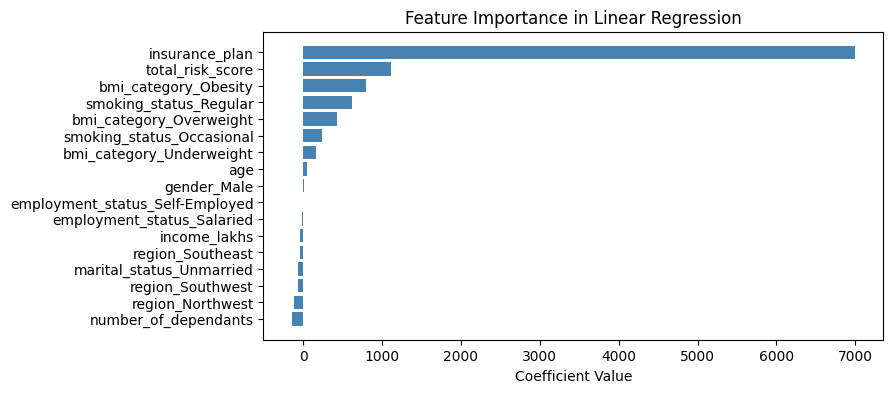

In [70]:
plt.figure(figsize=(8,4))
plt.barh(coef_df.index,coef_df["Coefficients"],color="steelblue")
plt.xlabel("Coefficient Value")
plt.title("Feature Importance in Linear Regression")
plt.show()

In [71]:
model_rg = Ridge()
model_rg.fit(X_train,y_train)
train_score = model_rg.score(X_train,y_train)
test_score= model_rg.score(X_test,y_test)
print("Train Score = ",train_score,"\nTest Score = ",test_score)

Train Score =  0.6020466631305188 
Test Score =  0.6047715291063815


In [72]:
# lets try diff model

In [73]:
from xgboost import XGBRegressor
model_xg = XGBRegressor()
model_xg.fit(X_train,y_train)
train_score = model_xg.score(X_train,y_train)
test_score= model_xg.score(X_test,y_test)
print("Train Score = ",train_score,"\nTest Score = ",test_score)

Train Score =  0.7251046895980835 
Test Score =  0.5638787746429443


In [74]:
model_xgb = XGBRegressor()
param_grid = {
    "n_estimators" : [20,40,50],
    "learning_rate" : [0.01,0.1,0.2],
    "max_depth" : [3,4,5]
}
random_search = RandomizedSearchCV(model_xgb,param_grid,n_iter=10,cv=3,scoring='r2',random_state=42)
random_search.fit(X_train,y_train)
random_search.best_score_,random_search.best_params_

(np.float64(0.5997088948885599),
 {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1})

In [97]:
best_model = model_r
best_model.fit(X_train,y_train)
best_model.score(X_train,y_train),best_model.score(X_test,y_test)


(0.6020471274164894, 0.6047589163893645)

In [77]:
# feature importancw is not that good visual in XGBoost

In [78]:
# we just cant decide on the basis of r2 score

In [79]:
## we will start error analysis

In [98]:
y_pred = best_model.predict(X_test)
residuals = y_pred - y_test
residuals_pct = residuals*100 / y_test

residuals_df = pd.DataFrame({
    "actual" : y_test,
    "predicted" : y_pred,
    "diff" : residuals,
    "diff_pct" : residuals_pct
})
residuals_df.head()

,actual,predicted,diff,diff_pct
12774,6238,6625.420564,387.420564,6.210653
14758,9462,7117.148903,-2344.851097,-24.781770
13205,5152,7052.316369,1900.316369,36.885023
14278,6988,7924.504344,936.504344,13.401608
19351,4917,6696.274716,1779.274716,36.186185


<Axes: xlabel='diff_pct', ylabel='Count'>

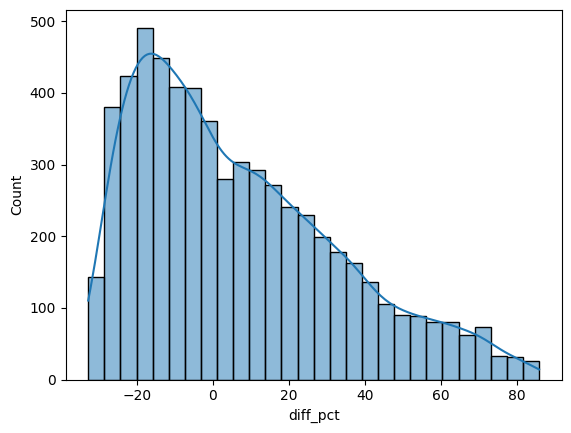

In [99]:
sns.histplot(residuals_df["diff_pct"],kde=True)

In [82]:
# it states that some errors are greater than 60 and 80 pct its not good

In [100]:
extreme_error_threshold = 10
extreme_residuals_df = residuals_df[np.abs(residuals_df["diff_pct"])>extreme_error_threshold]
extreme_residuals_df

,actual,predicted,diff,diff_pct
14758,9462,7117.148903,-2344.851097,-24.781770
13205,5152,7052.316369,1900.316369,36.885023
14278,6988,7924.504344,936.504344,13.401608
19351,4917,6696.274716,1779.274716,36.186185
10622,8947,7325.713340,-1621.286660,-18.121009
...,...,...,...,...
399,8673,7425.832654,-1247.167346,-14.379884
17652,7635,6571.972018,-1063.027982,-13.923091
5807,4845,7068.186558,2223.186558,45.886203
10298,13866,11067.225920,-2798.774080,-20.184437


In [84]:
residuals_df.shape , extreme_residuals_df.shape

((6026, 4), (4407, 4))

In [101]:
extreme_residuals_df.shape[0]*100 / residuals_df.shape[0] # 30 pct are errors in model

73.08330567540658

In [102]:
X_test.index

Index([12774, 14758, 13205, 14278, 19351, 10622, 16391, 14799, 17184, 16348,
       ...
        8695,  9658, 14195,  1365,   399, 17652,  5807, 10298, 13316,  2583],
      dtype='int64', length=6026)

In [103]:
extreme_residuals_df.index

Index([14758, 13205, 14278, 19351, 10622, 14799, 16348,  5573,  5634, 14882,
       ...
       10266,  5484,  8988,  9658,  1365,   399, 17652,  5807, 10298, 13316],
      dtype='int64', length=4404)

In [104]:
extreme_error_df = X_test.loc[extreme_residuals_df.index]
extreme_error_df.head()

,age,number_of_dependants,income_lakhs,insurance_plan,total_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
14758,0.285714,0.000000,0.060606,0.0,0.000000,0,0,0,1,1,0,0,0,0,1,0,1
13205,0.714286,0.333333,0.141414,0.0,0.000000,1,1,0,0,1,0,0,0,0,1,0,1
14278,0.714286,0.333333,0.222222,0.0,0.000000,1,0,1,0,1,1,0,0,0,1,0,0
19351,0.571429,0.000000,0.101010,0.0,0.000000,1,0,0,1,1,0,0,1,0,0,0,0
10622,0.428571,0.333333,0.050505,0.0,0.357143,0,0,1,0,1,0,1,0,0,0,0,0


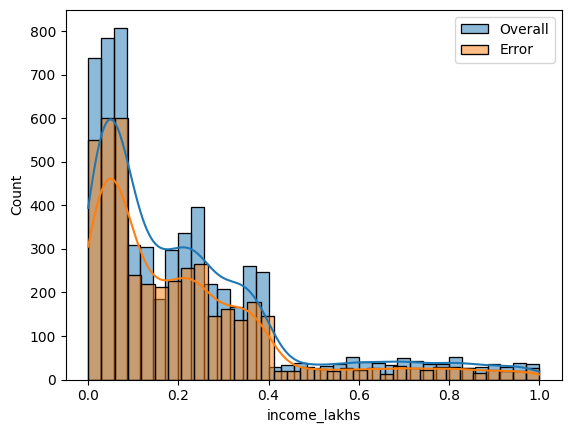

In [105]:
sns.histplot(X_test.income_lakhs,kde = True,label="Overall")
sns.histplot(extreme_error_df.income_lakhs,kde = True,label="Error")
plt.legend()
plt.show()

In [90]:
# both distribution is simililar 

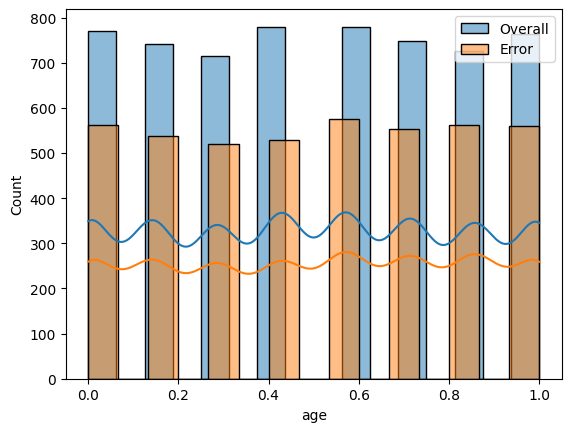

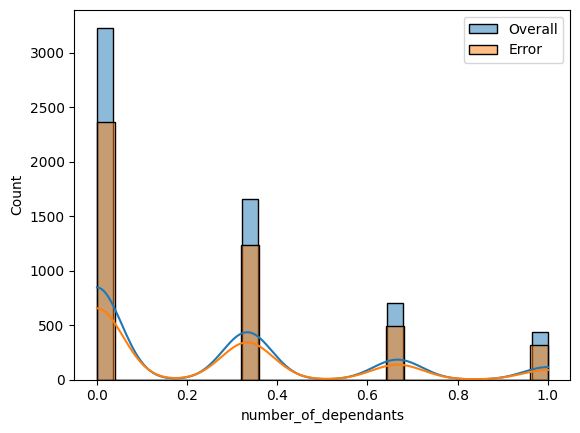

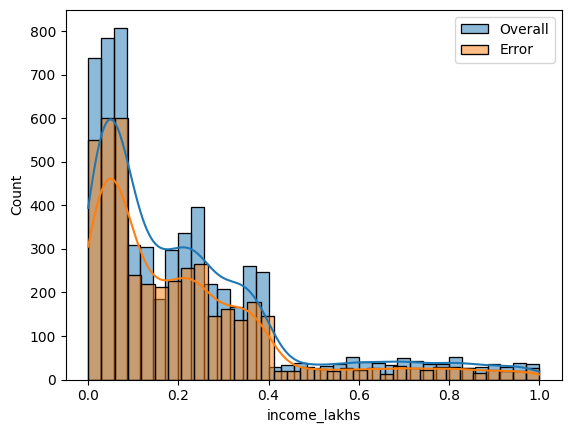

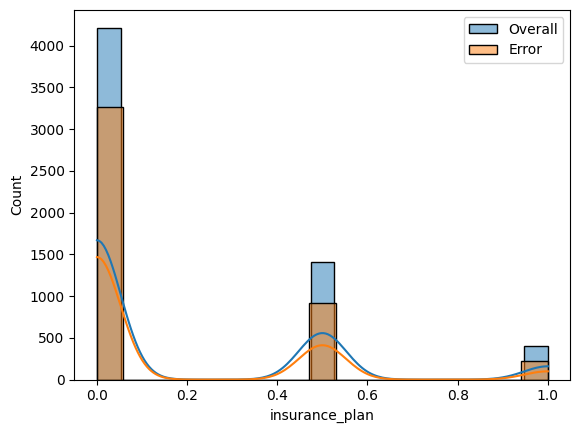

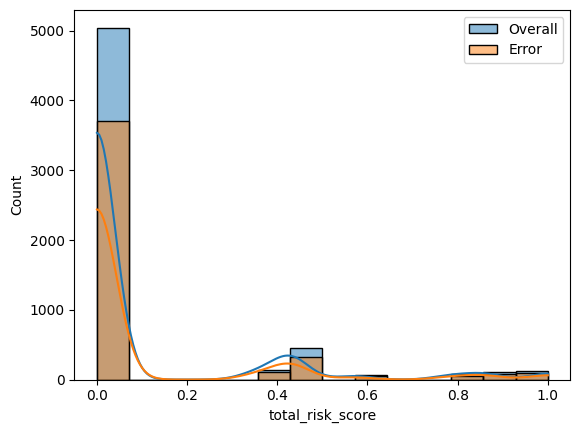

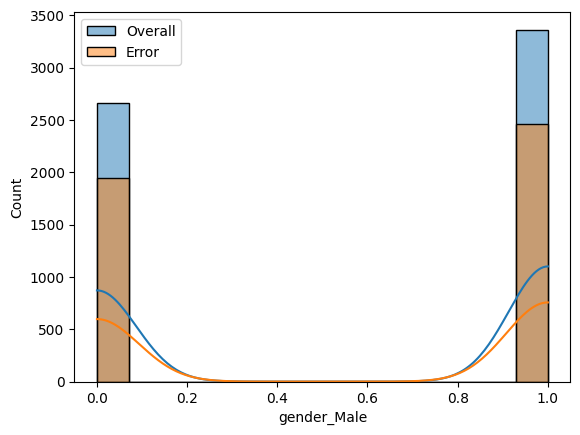

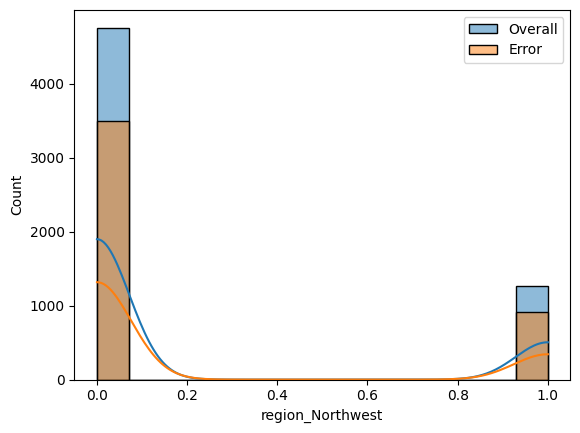

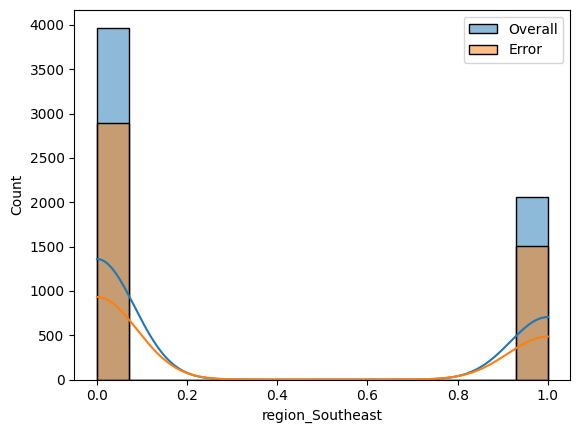

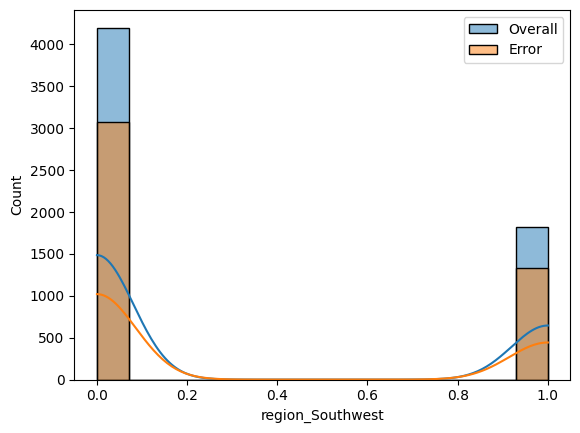

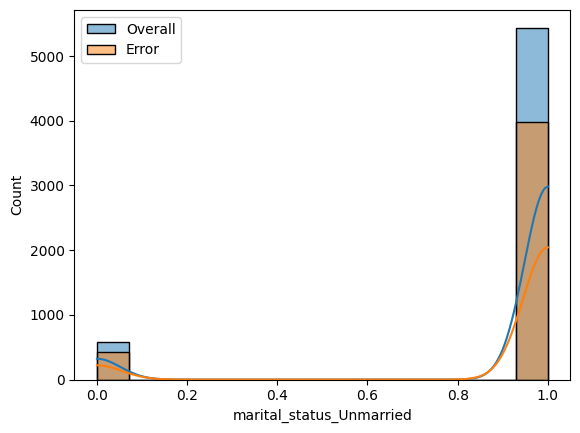

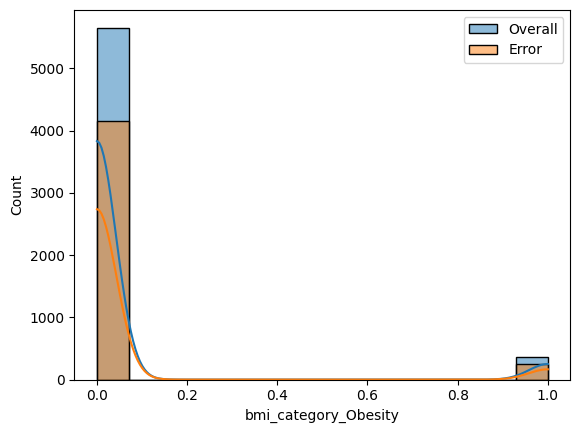

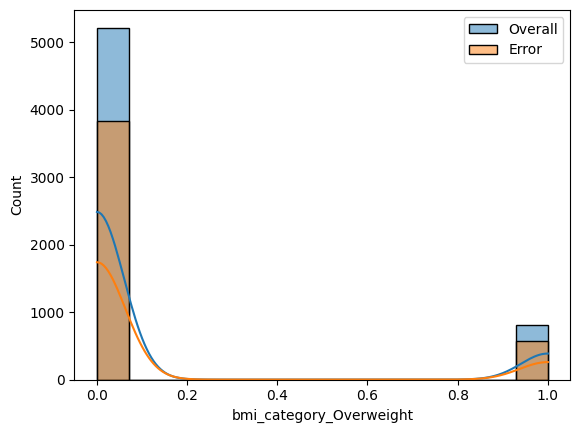

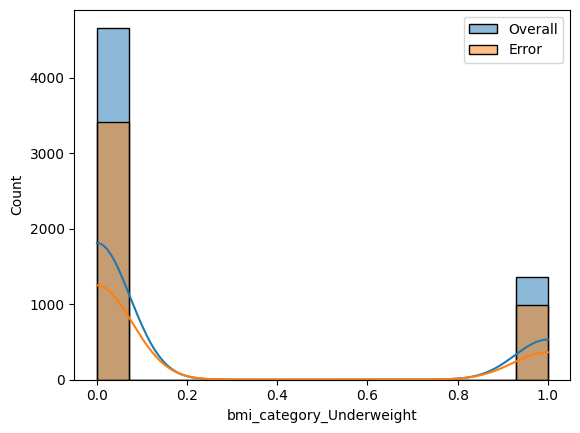

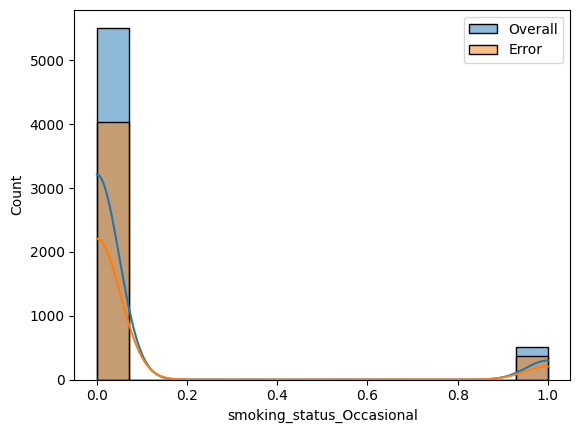

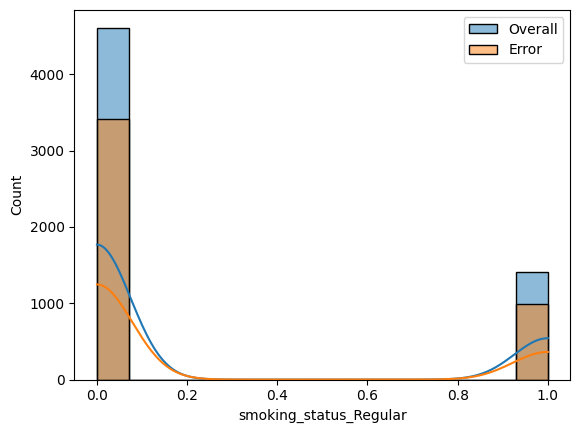

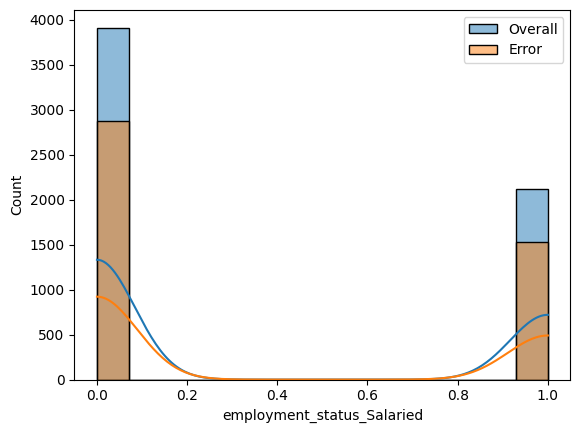

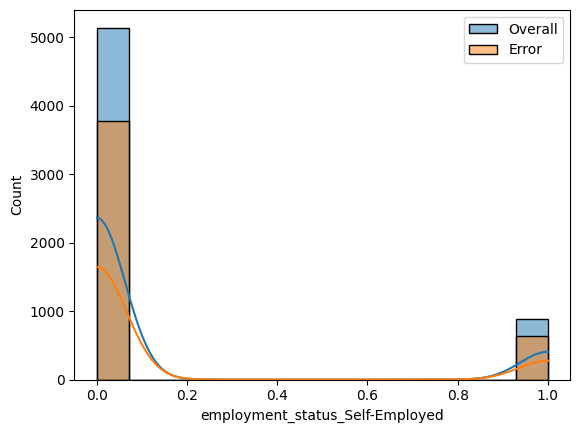

In [106]:
for feature in X_test.columns :
    sns.histplot(X_test[feature],kde = True,label="Overall")
    sns.histplot(extreme_error_df[feature],kde = True,label="Error")
    plt.legend()
    plt.show()

In [107]:
# for ypumg age group we need more data this is one of the optiuon

In [93]:
extreme_error_df["income_level"] = -1
df_reversed= pd.DataFrame(minmax.inverse_transform(extreme_error_df[cols_to_scale]),columns=extreme_error_df[cols_to_scale].columns)
df_reversed

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
0,20.0,0.0,-2.0,7.0,1.0
1,23.0,1.0,-2.0,15.0,1.0
2,23.0,1.0,-2.0,23.0,1.0
3,22.0,0.0,-2.0,11.0,1.0
4,21.0,1.0,-2.0,6.0,1.0
...,...,...,...,...,...
4402,19.0,2.0,-2.0,12.0,1.0
4403,22.0,0.0,-2.0,35.0,1.0
4404,24.0,1.0,-2.0,5.0,1.0
4405,18.0,0.0,-2.0,12.0,2.0


<Axes: xlabel='age', ylabel='Count'>

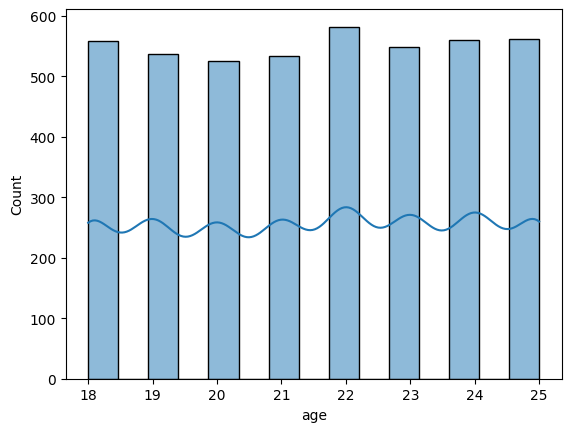

In [94]:
sns.histplot(df_reversed.age,kde=True)

In [95]:
df_reversed["age"].quantile(0.97) # means 95 % of our records are 25 age in extreme error

np.float64(25.0)

In [96]:
# there is some problem we need to analyse further